#### Problem statement :
    Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable.
    
#### Problem Framing:
    We have to build a model to predict the flight ticket prices. Our target feature is 'Price' which is an numerical integer feature. So our problem is "Supervised Regression" type.
    
#### Performance measurement:
    We will measure the performance of our model using mean_squared_error and mean_absolute_error. Mean squared error is the mean of squares of errors between predicted outputs and actual test outputs. While, mean absolute error is the mean of absolute errors between the predicted outputs and actual test outputs.
    
#### Datset:
    We have been provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.
    
    Size of training set: 10683 records
    Size of test set: 2671 records

#### Features:

##### Airline: 
    The name of the airline.

##### Date_of_Journey: 
    The date of the journey

##### Source:
    The source from which the service begins.

##### Destination: 
    The destination where the service ends.

##### Route: 
    The route taken by the flight to reach the destination.

##### Dep_Time: 
    The time when the journey starts from the source.

##### Arrival_Time:
    Time of arrival at the destination.

##### Duration: 
    Total duration of the flight.

##### Total_Stops: 
    Total stops between the source and destination.

##### Additional_Info: 
    Additional information about the flight

##### Price: 
    The price of the ticket

#### load necessary libraries

In [1]:
import pdb
# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Data analysis and wrangling
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sn

# for label encoding
from sklearn.preprocessing import LabelEncoder

# for standard scaling
from sklearn.preprocessing import StandardScaler,MinMaxScaler

# for linear regression
from sklearn.linear_model import LinearRegression

# for split into training and testing
from sklearn.model_selection import train_test_split

# for metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

#### load dataset

In [2]:
train_df=pd.read_excel("C:/Users/ashis/Downloads/Flight_Ticket_Participant_Datasets-20190305T100527Z-001/Flight_Ticket_Participant_Datasets/Data_Train.xlsx")

In [3]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
test_df=pd.read_excel("C:/Users/ashis/Downloads/Flight_Ticket_Participant_Datasets-20190305T100527Z-001/Flight_Ticket_Participant_Datasets/Test_set.xlsx")

In [5]:
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


#### For  **exploratory data analysis**, we will combine our training and testing data.

In [6]:
temp_train_df=pd.DataFrame(data=train_df)
temp_test_df=pd.DataFrame(data=test_df)

In [7]:
combined_df=pd.concat([temp_train_df,temp_test_df],ignore_index=True)

In [8]:
combined_df.shape # 10683+2671

(13354, 11)

### Step-1 Descriptive Analysis

#### check dimensionality of dataframe

In [9]:
train_df.shape

(10683, 11)

Our training dataset has $10683$ flight records which are containing data in **10 independent** features and **1 target feature**.

#### check record counts and datatype of features

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


**Route** and **Total_Stops** features have $1$ record missing/null as compared to other features. Only **Price**,which is our target variable is **int64** type, rest **all independent** features are **object** type. 

#### check duplicated records

In [11]:
dup_train=train_df[train_df.duplicated()]
dup_train.shape

(220, 11)

Our **training** dataset has $220$ duplicated records, we will drop these records.

In [12]:
train_df.drop_duplicates(inplace=True)

In [13]:
dup_train=train_df[train_df.duplicated()]
dup_train.shape

(0, 11)

Now our **training** dataset **donot have any duplicate** records.

#### check missing/null values

In [14]:
round(train_df.isnull().sum()/train_df.shape[0]*100,2).astype(str)+"%"

Airline             0.0%
Date_of_Journey     0.0%
Source              0.0%
Destination         0.0%
Route              0.01%
Dep_Time            0.0%
Arrival_Time        0.0%
Duration            0.0%
Total_Stops        0.01%
Additional_Info     0.0%
Price               0.0%
dtype: object

#### check missing/null values in the form of ' ?'

In [15]:
round(train_df.isin([' ?']).sum()/train_df.shape[0]*100,2).astype(str)+"%"

Airline            0.0%
Date_of_Journey    0.0%
Source             0.0%
Destination        0.0%
Route              0.0%
Dep_Time           0.0%
Arrival_Time       0.0%
Duration           0.0%
Total_Stops        0.0%
Additional_Info    0.0%
Price              0.0%
dtype: object

We do not have any missing values in the form of **?**.

### Step-2 Exploratory Data Analysis

We will use **combined dataset of training and testing** for exploratory analysis to better understand the independent features as well as the relationship between all features.

In [16]:
combined_df.shape

(13354, 11)

After **combining** both training and testing datasets, we see that total number of records are $13354$

In [17]:
# store column names in a variable
list_cols=combined_df.columns

In [18]:
list_cols

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

##### 1.'Airline' - The name of the airline

In [19]:
combined_df['Airline'].dtypes

dtype('O')

In [20]:
combined_df['Airline'].value_counts()

Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

We have been provided with the data from total $12$ airlines.

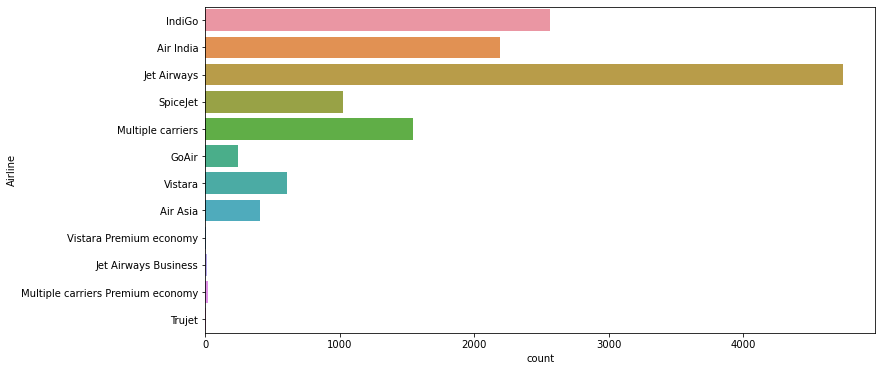

In [21]:
plt.figure(figsize=(12,6))
sn.countplot(y=combined_df['Airline'])
plt.show()

Most of the flights in our dataset are operated by **Jet Airways** , followed by **IndiGo** and **Air India.** We can also see , **SpiceJet, GoAir, Vistara** and **Air Asia** also have significant number of flights operated in our dataset.

In [22]:
list_cols[1]

'Date_of_Journey'

##### 2.'Date_of_Journey' - The date of the journey

In [23]:
combined_df['Date_of_Journey'].dtypes

dtype('O')

In [24]:
combined_df['Date_of_Journey']=pd.to_datetime(combined_df['Date_of_Journey'])

We have converted the values from **Date_of_Journey** feature to **timestamp** type for the better analysis.

In [25]:
combined_df['Day of journey']=combined_df['Date_of_Journey'].dt.day
combined_df['Month of journey']=combined_df['Date_of_Journey'].dt.month

In [26]:
combined_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day of journey,Month of journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,3,1


We have extracted the **day of the journey** and **month of journey** from each flight record so that we can have more **better understanding of the relation between day of journey and flight prices.**

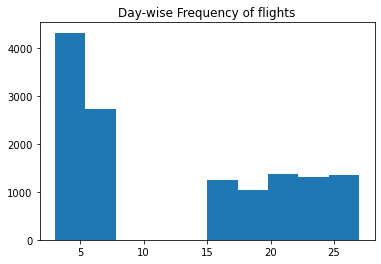

In [27]:
plt.hist(combined_df['Day of journey'])
plt.title("Day-wise Frequency of flights")
plt.show()

From above plot, we can see that the **number of flights** are very **high at the start of month**, as month progresses we see **saturation in the number of flights between 15-25**. We do not have any flight data available for the dates around 7-8 days.

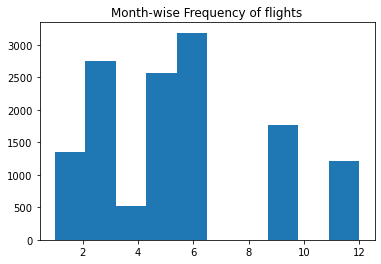

In [28]:
plt.hist(combined_df['Month of journey'])
plt.title("Month-wise Frequency of flights")
plt.show()

From above plot, we can see that the **flights frequency is high in the first 6 months of the year** as compared to very less frequencies in the later months of the year.

In [29]:
list_cols[3]

'Destination'

##### 3.'Source'-

In [30]:
combined_df['Source'].value_counts()

Delhi       5682
Kolkata     3581
Banglore    2752
Mumbai       883
Chennai      456
Name: Source, dtype: int64

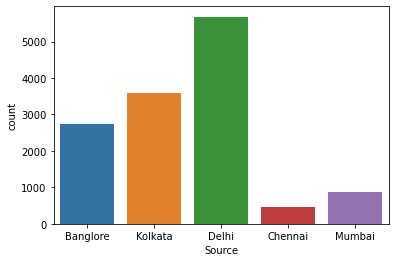

In [31]:
sn.countplot(combined_df['Source'])
plt.show()

From above figure, we see that **most of the flights have taken-off from Delhi, followed by Kolkata and Banglore**. Very few flights departure records are available for Mumbai and Chennai.

##### 4. 'Destination'

In [32]:
combined_df['Destination'].value_counts()

Cochin       5682
Banglore     3581
Delhi        1582
New Delhi    1170
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64

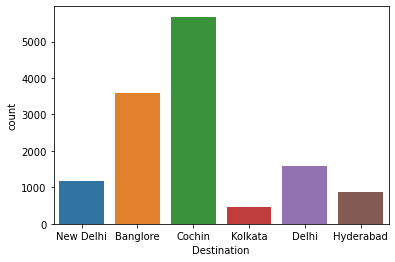

In [33]:
sn.countplot(combined_df['Destination'])
plt.show()

From above figure, we see that **most of the flights have been departed for Cochin, followed by Bangalore.** Very few records are available for New Delhi, Delhi, Hyderabad and Kolkata as destination.

In [34]:
list_cols[4]

'Route'

##### 5.'Route'

In [35]:
combined_df['Route'].dtypes

dtype('O')

In [36]:
combined_df['Route'].value_counts()

DEL → BOM → COK                3000
BLR → DEL                      1941
CCU → BOM → BLR                1232
CCU → BLR                       896
BOM → HYD                       785
                               ... 
BOM → CCU → HYD                   1
BOM → JDH → JAI → DEL → HYD       1
BOM → UDR → DEL → HYD             1
BOM → VGA → TIR → HYD             1
CCU → IXA → BLR                   1
Name: Route, Length: 132, dtype: int64

In [37]:
list_cols[5]

'Dep_Time'

##### 6.'Dep_Time'

In [38]:
combined_df['Dep_Time'].dtypes

dtype('O')

In [39]:
combined_df['Dep_Time']

0        22:20
1        05:50
2        09:25
3        18:05
4        16:50
         ...  
13349    20:30
13350    14:20
13351    21:50
13352    04:00
13353    04:55
Name: Dep_Time, Length: 13354, dtype: object

In [40]:
hours=[]
for time in combined_df['Dep_Time']:
    hours.append(time.split(":")[0])

In [41]:
combined_df['Dep_hours']=hours

We have seperated the **departure hours** from the 'Dep_Time' feature **for better understanding of relation between departure time and prices**.

In [42]:
combined_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day of journey,Month of journey,Dep_hours
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,22
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,5,1,05
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,6,9,09
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,5,12,18
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,3,1,16


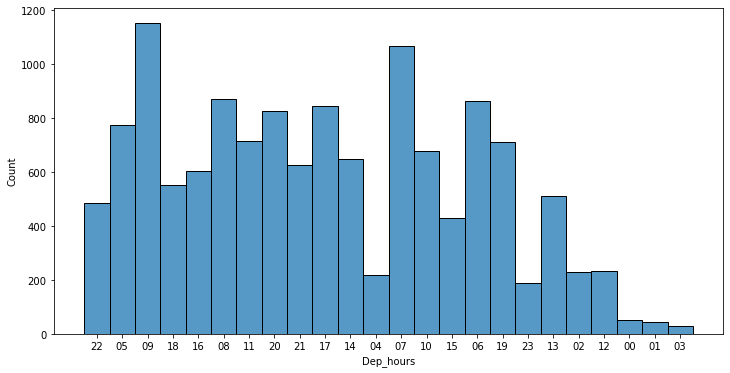

In [43]:
plt.figure(figsize=(12,6))
sn.histplot(combined_df['Dep_hours'])
plt.show()

From above figure, we see that **most of the flights have departed in the morning between 5-11 a.m.** After that there is gradual decrease in the flights departure by any airlines.

In [44]:
list_cols[6]

'Arrival_Time'

##### 7.'Arrival_Time'

In [45]:
combined_df['Arrival_Time'].value_counts()

19:00           536
21:00           466
19:15           434
16:10           185
12:35           159
               ... 
23:25 25 May      1
00:20 04 Apr      1
02:45 16 Apr      1
02:45 28 May      1
23:45 13 Mar      1
Name: Arrival_Time, Length: 1451, dtype: int64

We will seperate the hours from the time to better analyse the relation between time of flights and prices.

In [46]:
hours=[]
for time in combined_df['Arrival_Time']:
    hours.append(time.split(":")[0])

In [47]:
combined_df['Arrival_hours']=hours

In [48]:
combined_df['Arrival_hours'].shape

(13354,)

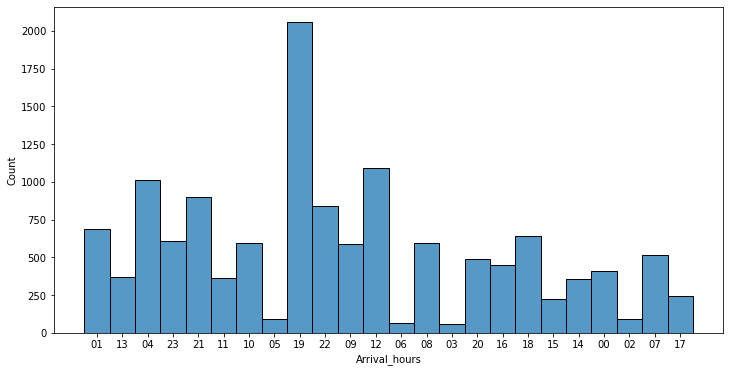

In [49]:
plt.figure(figsize=(12,6))
sn.histplot(combined_df['Arrival_hours'])
plt.show()

From above plot, we see that many flights arrive at 7pm in the evening, then at 12 in the afternoon and then 4 in the morning.

In [50]:
list_cols[7]

'Duration'

##### 8.'Duration'

In [51]:
combined_df['Duration'].value_counts()

2h 50m     672
1h 30m     493
2h 45m     432
2h 55m     418
2h 35m     399
          ... 
30h 15m      1
41h 20m      1
40h 20m      1
31h 10m      1
42h 5m       1
Name: Duration, Length: 374, dtype: int64

In [52]:
duration=[]
for time in combined_df['Duration']:
    duration.append(time.split("h")[0])

In [53]:
combined_df['duration_hours']=duration

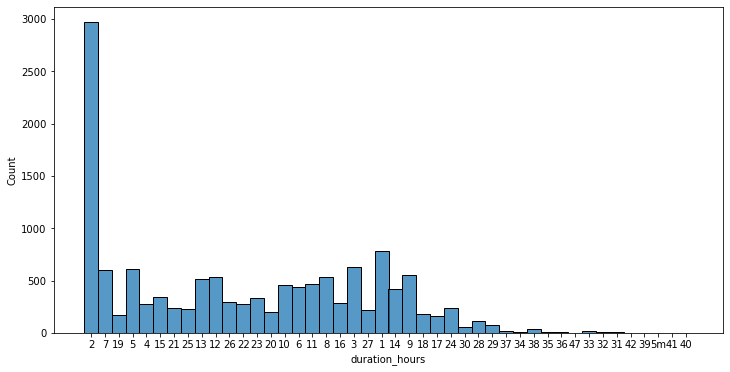

In [54]:
plt.figure(figsize=(12,6))
sn.histplot(combined_df['duration_hours'])
plt.show()

Most of the flights are taking an average 2 hours to travel between two cities, very very few flights are operating for more than 30 hours.

In [55]:
list_cols[8]

'Total_Stops'

##### 9.'Total_Stops'

In [56]:
combined_df['Total_Stops'].value_counts()

1 stop      7056
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: Total_Stops, dtype: int64

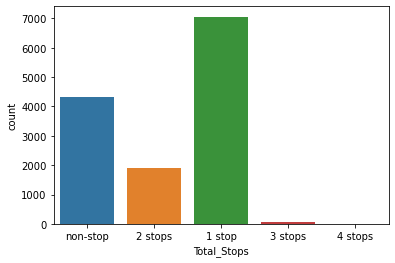

In [57]:
sn.countplot(combined_df['Total_Stops'])
plt.show()

Most of the filghts data we have are operating with at least 1 stop in between the destinations. Non-stop flights are almost half of 1-stop flights. Very few flights travel with 3 or 4 stops.

In [58]:
list_cols

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

##### 10.'Additional_Info'

In [59]:
combined_df['Additional_Info'].value_counts()

No info                         10493
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
Red-eye flight                      1
2 Long layover                      1
1 Short layover                     1
Name: Additional_Info, dtype: int64

In [60]:
combined_df['Additional_Info']!='No info'

0        False
1        False
2        False
3        False
4        False
         ...  
13349    False
13350    False
13351    False
13352    False
13353    False
Name: Additional_Info, Length: 13354, dtype: bool

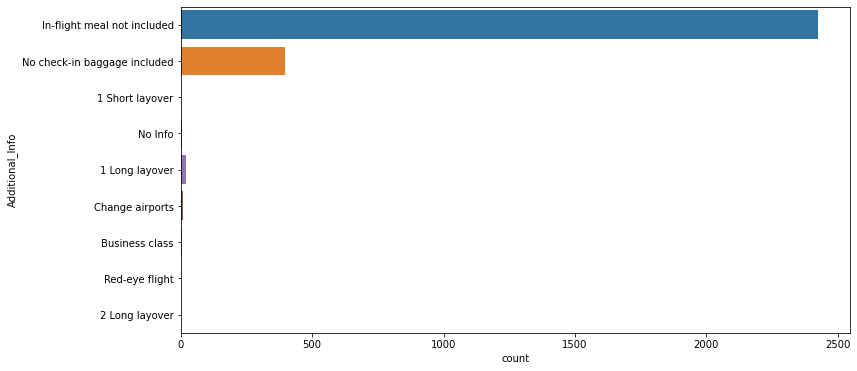

In [61]:
plt.figure(figsize=(12,6))
sn.countplot(y=combined_df['Additional_Info'][combined_df['Additional_Info']!='No info'])
plt.show()

From above fig, we can see that there are no as such parameters which have been commonly repeated to analyse them. Only 'In-flight meal not included' and 'No check-in baggage included' are the only two parameters with significant repeat.

##### 11. 'Price'

In [62]:
combined_df['Price'].value_counts()

10262.0    258
10844.0    212
7229.0     162
4804.0     160
4823.0     131
          ... 
14462.0      1
6349.0       1
3758.0       1
6834.0       1
9585.0       1
Name: Price, Length: 1870, dtype: int64

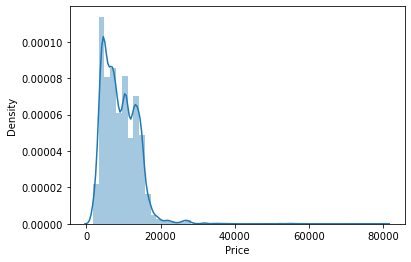

In [63]:
sn.distplot(combined_df['Price'])
plt.show()

From above distplot, we see that the flight prices have been saturated mostly below 20000, very few flight tickets are more costly than 30000.

#### Multivariate Analysis:

In [64]:
combined_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Day of journey', 'Month of journey',
       'Dep_hours', 'Arrival_hours', 'duration_hours'],
      dtype='object')

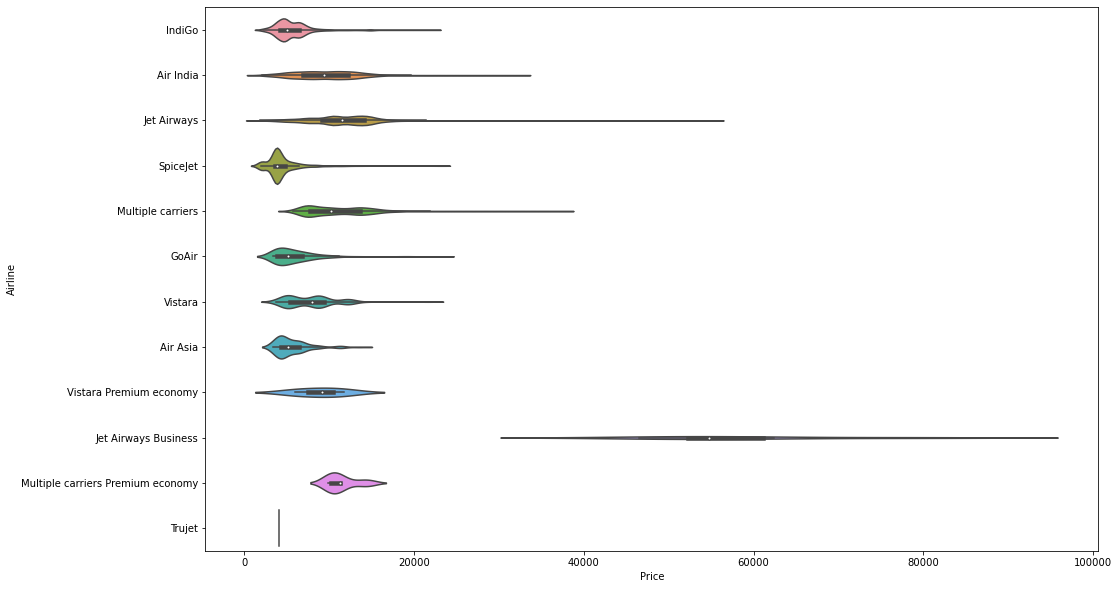

In [68]:
plt.figure(figsize=(16,10))
sn.violinplot(y='Airline',x='Price',data=combined_df)
plt.show()

In [89]:
combined_df['Additional_Info']=='In-flight meal not included','No check-in baggage included'

(0        False
 1        False
 2        False
 3        False
 4        False
          ...  
 13349    False
 13350    False
 13351    False
 13352    False
 13353    False
 Name: Additional_Info, Length: 13354, dtype: bool,
 'No check-in baggage included')

<Figure size 1872x720 with 0 Axes>

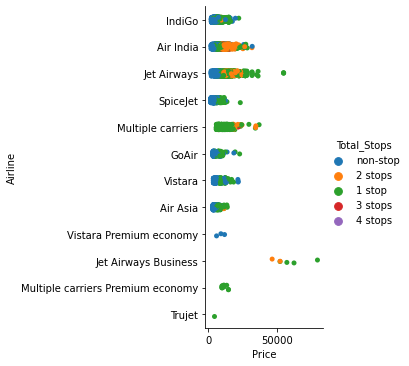

In [65]:
plt.figure(figsize=(26,10))
sn.catplot(y='Airline',x='Price',data=combined_df,hue='Total_Stops')
plt.show()

From above figure which shows the relationship between **Airlines** and **Prices**, we see that:
   
   For  all airlines *except Jet Airways Business and Trujet* all other airline carriers are operating non-stop flights and we see that the prices are very low for non-stop flights with few exceptions in cases of *Air India* as can be seen from above figure.
   
   We do not see many flights operating with *3 stops* or *4 stops*, and the prices are increasing as the stops increase which can be seen from the plot. The prices for *2 stop* and *1 stop* flights are more than the *non-stop* flights.

<Figure size 864x432 with 0 Axes>

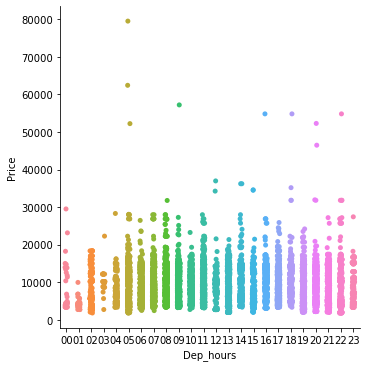

In [66]:
plt.figure(figsize=(12,6))
sn.catplot(x=combined_df['Dep_hours'].sort_values(),y=combined_df['Price'],data=combined_df)
plt.show()

In [72]:
combined_df['Dep_hours'].head()

0    22
1    05
2    09
3    18
4    16
Name: Dep_hours, dtype: object

From above plot, we see that the prices for flights which depart during the night hours are high as compared to flights which operate during afternoon hours.

In [73]:
dep_arr=pd.concat([combined_df['Dep_hours'],combined_df['Arrival_hours']],axis=1)
dep_arr.head()

,Dep_hours,Arrival_hours
0,22,01
1,05,13
2,09,04
3,18,23
4,16,21


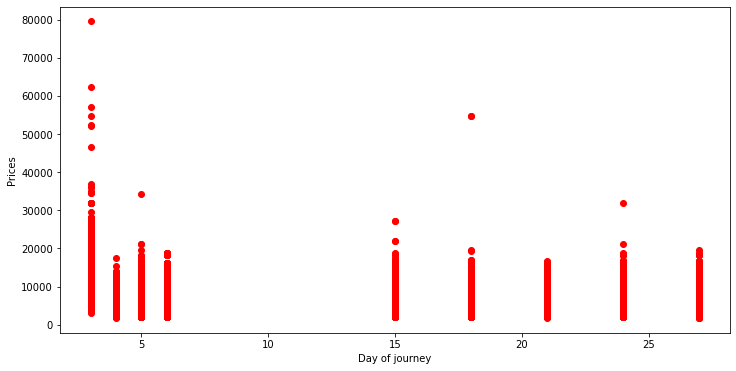

In [67]:
plt.figure(figsize=(12,6))
plt.scatter(combined_df['Day of journey'],combined_df['Price'],color='red')
plt.xlabel('Day of journey')
plt.ylabel('Prices')
plt.show()

<Figure size 864x432 with 0 Axes>

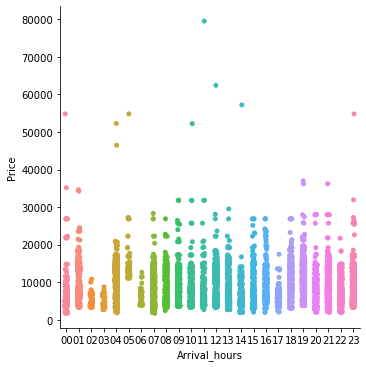

In [94]:
plt.figure(figsize=(12,6))
sn.catplot(x=combined_df['Arrival_hours'].sort_values(),y=combined_df['Price'],data=combined_df)
plt.show()

From above plot, we can see that flight prices at the start of month are higher as compared to other days. On other days after 5th day of month, the flight prices are becoming saturated.

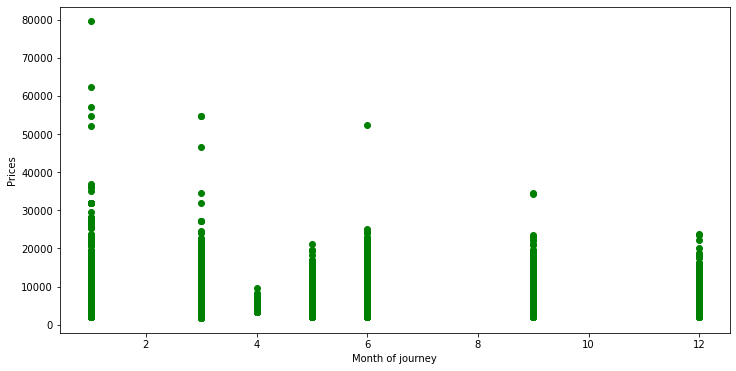

In [68]:
plt.figure(figsize=(12,6))
plt.scatter(combined_df['Month of journey'],combined_df['Price'],color='green')
plt.xlabel('Month of journey')
plt.ylabel('Prices')
plt.show()

From above plot, we see that flights operating at the start of the year have higher flight prices and the prices gradually decrease throughout the year.

### Step-3 Data Preprocessing

Before proceeding further, we will **create copy of the dataset** which will be passed for pre-processing before model building.

In [69]:
df_cp=pd.DataFrame(data=train_df)

In [70]:
df_cp.shape

(10463, 11)

### Data cleaning

In [109]:
train_df.shape

(10463, 11)

#### Outlier and skewness

In [71]:
df_cp.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [72]:
numerical_cols=[]
numerical_cols.clear()
for column in df_cp:
    if df_cp[column].dtypes!='object':
        numerical_cols.append(column)

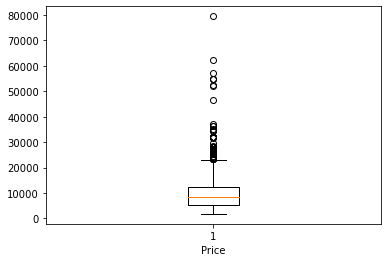

In [73]:
for column in numerical_cols:
    fig=plt.figure()
    ax=fig.add_subplot(111)
    ax.boxplot(df_cp[column])
    ax.set_xlabel(column)
    plt.show()

In [117]:
numerical_cols

['Price']

We will not treat the points away from the whiskers of boxplot as outliers because there is a chance that these outlying prices maybe actual prices for some flight carriers who operate in exclusive service domain only.

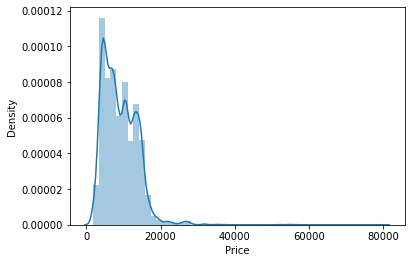

In [74]:
for column in numerical_cols:
    fig=plt.figure()
    ax=fig.add_subplot(111)
    ax=sn.distplot(df_cp[column])
    ax.set_xlabel(column)
    plt.show()

From above plot we see that because of the presence of outlying "Price" values, there is skewness present in the dataset

#### missing or null values

In [ ]:
for col in numerical_cols:
    df_cp[col]=

In [75]:
round(df_cp.isnull().sum()/df_cp.shape[0]*100,2).astype(str)+"%"

Airline             0.0%
Date_of_Journey     0.0%
Source              0.0%
Destination         0.0%
Route              0.01%
Dep_Time            0.0%
Arrival_Time        0.0%
Duration            0.0%
Total_Stops        0.01%
Additional_Info     0.0%
Price               0.0%
dtype: object

We see that very few percentage of records are having missing/null data, so we can drop those rows of records for better modelling.

In [76]:
df_cp.dropna(inplace=True)

In [77]:
round(df_cp.isnull().sum()/df_cp.shape[0]*100,2).astype(str)+"%"

Airline            0.0%
Date_of_Journey    0.0%
Source             0.0%
Destination        0.0%
Route              0.0%
Dep_Time           0.0%
Arrival_Time       0.0%
Duration           0.0%
Total_Stops        0.0%
Additional_Info    0.0%
Price              0.0%
dtype: object

### Feature extraction

In [78]:
df_cp.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


We will extract **Day and month** from *Date_of_Journey* feature, **hour values** from *Dep_Time* and *Arrival_Time* and *Duration* features.

In [79]:
df_cp['Date_of_Journey']=pd.to_datetime(df_cp['Date_of_Journey'])
df_cp['Day_of_Journey']=df_cp['Date_of_Journey'].dt.day
df_cp['Month_of_Journey']=df_cp['Date_of_Journey'].dt.month

In [80]:
df_cp.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


We will drop the **Date_of_Journey** column as we have extracted the important features from it.

In [81]:
df_cp.drop('Date_of_Journey',axis=1,inplace=True)

Now, we will extract **hour as a seperate feature** from features having **time** information.

In [82]:
hours=[]
hours.clear()
for time in df_cp['Dep_Time']:
    hours.append(time.split(":")[0])
df_cp['Dep_hour']=hours

In [83]:
hours1=[]
hours1.clear()
for time in df_cp['Arrival_Time']:
    hours1.append(time.split(":")[0])
df_cp['Arrival_hour']=hours1

hours2=[]
hours2.clear()
for time in df_cp['Duration']:
    hours2.append(time.split("h")[0])
df_cp['Duration_in_hours']=hours2

In [138]:
df_cp['Arrival_Time'].head()

0    01:10 22 Mar
1           13:15
2    04:25 10 Jun
3           23:30
4           21:35
Name: Arrival_Time, dtype: object

In [84]:
df_cp.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hour,Arrival_hour,Duration_in_hours
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,01,2
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,05,13,7
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,09,04,19
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12,18,23,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1,16,21,4


In [137]:
df_cp.shape

(10462, 13)

Now as we have extracted the **hour** features from them, we can drop the columns.

In [85]:
df_cp.drop('Dep_Time',axis=1,inplace=True)
df_cp.drop('Arrival_Time',axis=1,inplace=True)
df_cp.drop('Duration',axis=1,inplace=True)

In [86]:
df_cp.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hour,Arrival_hour,Duration_in_hours
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,01,2
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,05,13,7
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,09,04,19
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,23,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,21,4


#### Feature transformation

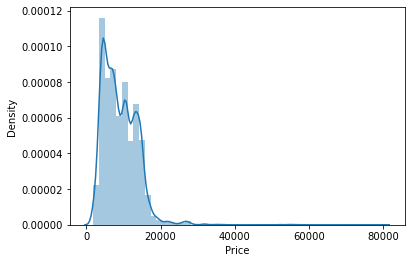

In [144]:
sn.distplot(df_cp['Price'])
plt.show()

We will try **log transform** to make the distribution of data more normal.

We see the distribution of data has become normal and the skewness has also been diminished to much extent. So we will keep log transform.

##### Label encoding

We will label encode all the 'Categorical' columns with datatype 'object'

In [87]:
le=LabelEncoder()

In [88]:
for col in df_cp.columns:
    if df_cp[col].dtypes=='object':
        df_cp[col]=le.fit_transform(df_cp[col])

In [89]:
df_cp.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hour,Arrival_hour,Duration_in_hours
0,3,0,5,18,4,8,3897,24,3,22,1,11
1,1,3,0,84,1,8,7662,5,1,5,13,41
2,4,2,1,118,1,8,13882,6,9,9,4,10
3,3,3,0,91,0,8,6218,5,12,18,23,38
4,3,0,5,29,0,8,13302,3,1,16,21,33


#### Split training dataset into independent and target feature

In [90]:
x=df_cp.drop(['Price'],axis=1)
y=df_cp['Price']

In [111]:
print(x.shape)
print(y.shape)

(10462, 11)
(10462,)


#### feature scaling

In [93]:
m=MinMaxScaler()

In [94]:
for col in x.columns:
    x[col]=m.fit_transform(x[col].values.reshape(-1,1))

In [91]:
s=StandardScaler()

In [100]:
for col in x.columns:
    x[col]=s.fit_transform(x[col].values.reshape(-1,1))

#### finding best random state for the dataset

In [106]:
def best_rndm_state():
    # temporary storage
    x_1=x
    y_1=y
    # intiating variables to store accuracy score and random state
    global min_MSE
    global maxRS
    maxRs=0
    # iterating with various random states
    for i in range(1,200):
        x_train_1,x_test_1,y_train_1,y_test_1=train_test_split(x_1,y_1,test_size=.33,random_state=i)
        LR = LinearRegression()
        LR.fit(x_train_1,y_train_1)
        predrf_1=LR.predict(x_test_1)
        MSE_1=mean_squared_error(y_test_1,predrf_1)
        if i==1:
            min_MSE=MSE_1
        elif i!=1:
            if MSE_1<min_MSE:
                min_MSE=MSE_1
                maxRs=i
        if i==200:
            del min_MSE
    return print("Minimum mean squared error is ",min_MSE," at random state ",maxRs)

In [107]:
best_rndm_state()

Minimum mean squared error is  11674849.367734736  at random state  34


Clearly we see that linear regression is not yielding minimum error between the predicted and actual test outputs for out training dataset. So we will go ahead with other regressor models.

## step-4 Modelling

#### Dataset split

In [117]:
x_train,x_test,y_train,y_test

In [118]:
print(x_train.shape)
print(y_train.shape)

(7009, 11)
(7009,)


#### linear regressor cross validation score

In [123]:
lr= LinearRegression()
score_cv = cross_val_score(lr, x_train, y_train, cv=10)

print('\n The absolute mean score we got from 10-Fold CV:',np.mean(score_cv))


 The absolute mean score we got from 10-Fold CV: 0.35530141089874273


#### Decision Tree Regressor

In [119]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

dtr=DecisionTreeRegressor()

dtr_cv=cross_val_score(dtr,x_train,y_train,cv=10)

print('\n The absolute mean score we got from 10-Fold CV:',np.mean(dtr_cv))


 The absolute mean score we got from 10-Fold CV: 0.7866247481074179


#### Random Forest Regressor

In [120]:
from sklearn.ensemble import RandomForestRegressor

rfr_cross_val=[]
rfr_n_estimators=[]

for i in range(10,50):
    rfr=RandomForestRegressor(n_estimators=i)
    rfr_n_estimators.append(i)
    rfr_cross_val.append(cross_val_score(rfr,x_train,y_train,cv=10).mean())
    
rf_cv=pd.DataFrame({})
rf_cv["RF CV Score"]=rfr_cross_val
rf_cv['n estimator']=rfr_n_estimators

rf_cv.max()

RF CV Score     0.872432
n estimator    49.000000
dtype: float64

#### Lasso regressor

In [126]:
from sklearn.linear_model import Lasso,Ridge

In [127]:
ls=Lasso()
ls.fit(x_train,y_train)
print(ls.score(x_train,y_train))
print(ls.score(x_test,y_test))

0.35722352361914933
0.4109054196138133


In [128]:
rg=Ridge()
rg.fit(x_train,y_train)
print(rg.score(x_train,y_train))
print(rg.score(x_test,y_test))

0.3572241466698146
0.4109043771084775


In [129]:
results1=[]
results1.clear()
results1.append(score_cv)
results1.append(dtr_cv)
results1.append(rf_cv['RF CV Score'])
results1.append(ls.score(x_test,y_test))
results1.append(rg.score(x_test,y_test))

names1=[]
names1.clear()
names1.append("Linear Regression")
names1.append("Decision Tree Regressor")
names1.append("Random Forest Regressor")
names1.append("Lasso")
names1.append("Ridge")

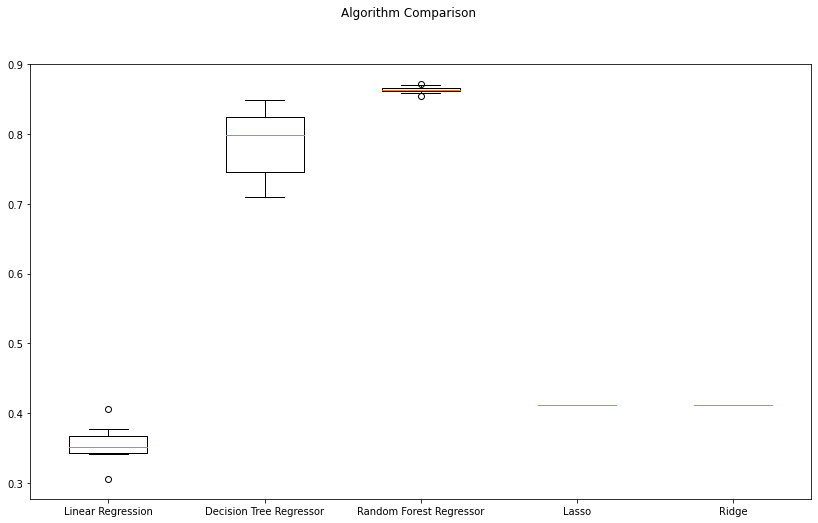

In [130]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111)
fig.suptitle('Algorithm Comparison')
plt.boxplot(results1)
ax.set_xticklabels(names1)
plt.show()

#### We will use Random Forest regressor

#### Step -5 Hyper parameter tuning

In [131]:
from sklearn.model_selection import GridSearchCV

model=RandomForestRegressor()

param={'n_estimators':[10,50,100]}

grid=GridSearchCV(estimator=model,param_grid=param)

grid.fit(x,y)

print(grid.best_score_)
print(grid.best_estimator_.n_estimators)
print(grid.best_params_)

0.8704032498088928
50
{'n_estimators': 50}


#### Saving the model

In [132]:
fin_mod=RandomForestRegressor(n_estimators=50)

In [ ]:
# import joblib
# joblib.dump()

### testing using pipeline

In [133]:
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
